# Homework solution TensorFlow: Fashion MNIST

https://www.kaggle.com/zalando-research/fashionmnist

## Loading the dataset

In [1]:
import tensorflow
tensorflow.__version__

'2.4.1'

In [2]:
tensorflow.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
gpus= tensorflow.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tensorflow.config.experimental.set_memory_growth(gpus[0], True)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

11033


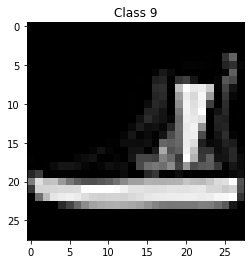

In [8]:
i = np.random.randint(0, len(X_train))
print(i)
plt.imshow(X_train[i], cmap = 'gray')
plt.title('Class ' + str(y_train[i]))
plt.show()

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

In [11]:
X_train[0].shape

(784,)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_test = X_test.reshape(10000, 28 * 28)
X_test.shape

(10000, 784)

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
X_train /= 255
X_test /= 255

In [16]:
X_train.max()

1.0

In [17]:
X_train.min()

0.0

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Neural network (training)

In [19]:
(784 + 10) / 2

397.0

In [20]:
network = Sequential()
network.add(Dense(input_shape = (784,), units = 397, activation = 'relu'))
network.add(Dense(units = 397, activation = 'relu'))
network.add(Dense(units = 10, activation = 'softmax'))

In [21]:
network.compile(loss = 'sparse_categorical_crossentropy', 
                      optimizer = 'adam', 
                      metrics = ['accuracy'])

In [22]:
history = network.fit(X_train, y_train, batch_size = 128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.6437 - accuracy: 0.7741
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3592 - accuracy: 0.8677
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3252 - accuracy: 0.8793
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2958 - accuracy: 0.8901
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2812 - accuracy: 0.8945
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2616 - accuracy: 0.9030
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2468 - accuracy: 0.9071
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2291 - accuracy: 0.9134
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2199 - accuracy: 0.9183
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2099 - accuracy: 0.9218

## Neural network (evaluation)

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

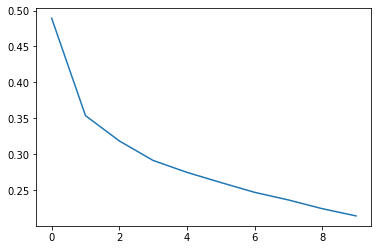

In [24]:
plt.plot(history.history['loss'])

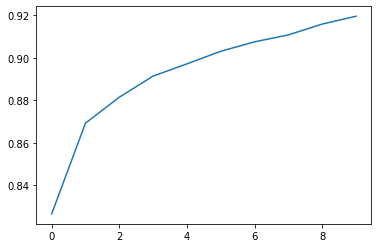

In [25]:
plt.plot(history.history['accuracy'])

In [26]:
accuracy_test = network.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3238 - accuracy: 0.8884


In [27]:
predictions = network.predict(X_test)

In [28]:
predictions[0]

array([5.1293263e-08, 2.9644664e-07, 6.0712523e-08, 1.8773967e-07,
       9.3024063e-08, 9.2133234e-04, 4.3889443e-08, 5.8307573e-03,
       2.9821617e-08, 9.9324715e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

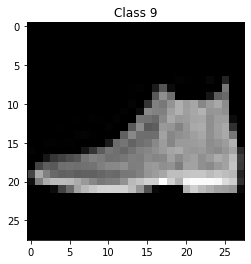

In [31]:
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.title('Class ' + str(y_test[0]))
plt.show()